In [1]:
import pandas as pd

df = pd.read_csv('../data/test.csv')
df = df[df['description'].notnull()]

In [2]:
## description cleaning

import re
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

df['description'] = df['description'].apply(cleanhtml)

In [3]:
df['key_skills']

0                                                      NaN
1                                                      NaN
2        {"Работа в команде","Работа в условиях многоза...
3        {Стрессоустойчивость,Ответственность,Коммуника...
4        {"Работа в команде","Умение работать в команде...
                               ...                        
49995    {"Пользователь ПК",Инвентаризация,"Складской У...
49996    {"Ведение отчетности","Учет материалов","Докум...
49997    {"Ведение отчетности","Учет материалов","Докум...
49998    {"Ведение отчетности","Учет материалов","Докум...
49999    {"Грамотная речь","Деловой этикет","Прием посе...
Name: key_skills, Length: 49550, dtype: object

In [4]:
df['key_skills'] = df['key_skills'].fillna('')
df['key_skills'] = df['key_skills'].str.replace('{','').str.replace('}','').str.replace('"','')
df['key_skills_list'] = df['key_skills'].str.split(',')

/tmp/ipykernel_90212/41056613.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['key_skills'] = df['key_skills'].str.replace('{','').str.replace('}','').str.replace('"','')


## Задачи
* Сколько в среднем пишут ключевых навыков в вакансиях: медиана+гистограмма
* Как часто в них остаются пропуски: процент 
* Какой длины(колчиество слов) обычно описания: медиана+гистограмма

In [13]:
import matplotlib.pyplot as plt

## Сколько в среднем пишут ключевых навыков в вакансиях

Всего вакансий в сэмпле датасета 50тыс.

Text(7, 11000, 'Медиана = 4.0')

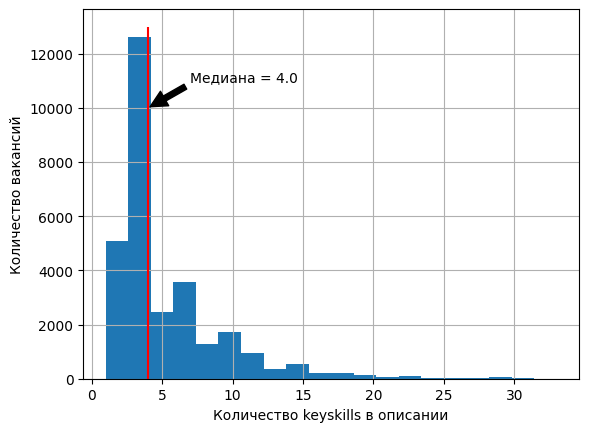

In [68]:
fig, ax = plt.subplots()
# ax.plot(bins, y, '--', color ='black')



key_skills_num = df['key_skills_list'].apply(len)-1
key_skills_num_notnull = key_skills_num[key_skills_num>0]
key_skills_num_notnull.hist(bins = 20)
median = key_skills_num_notnull.median()

ax.set_xlabel('Количество keyskills в описании')
ax.set_ylabel('Количество вакансий')
ax.vlines(median,  0, 13000, color = 'r')
plt.annotate(f"Медиана = {median}", xy=(4, 10000), xytext=(7, 11000),
            arrowprops=dict(facecolor='black', shrink=0.05))

## Как часто в них остаются пропуски: процент

Text(0.5, 0, 'Диаграмма незаполненных/заполненных ключевых навыков')

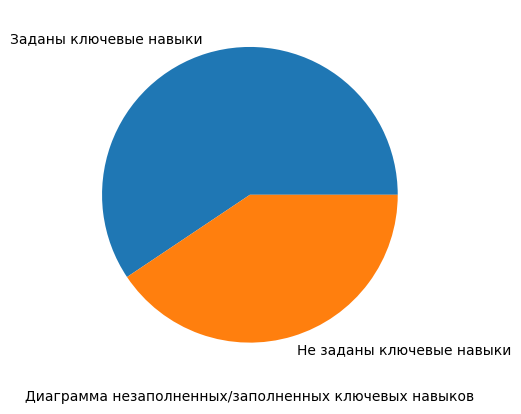

In [78]:
fig, ax = plt.subplots()


key_skills_num[key_skills_num>0] = 1
key_skills_for_pie = key_skills_num.replace({0:'Не заданы ключевые навыки', 1:'Заданы ключевые навыки'}).value_counts()
key_skills_for_pie.plot(kind='pie')
ax.set_ylabel('')
ax.set_xlabel('Диаграмма незаполненных/заполненных ключевых навыков')


## Какой длины(колчиество слов) обычно описания: медиана+гистограмма

Text(500, 7000, 'Медиана = 140.0')

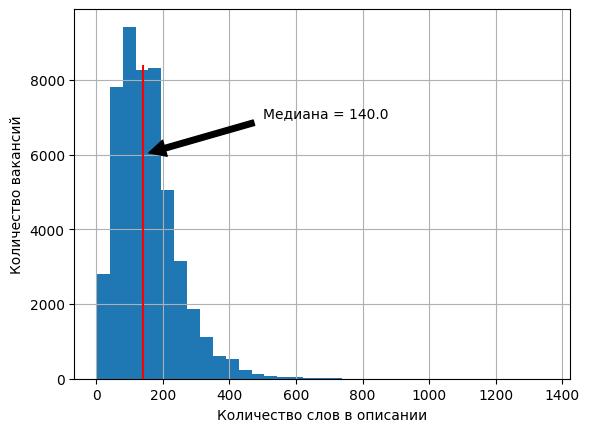

In [88]:
fig, ax = plt.subplots()
# ax.plot(bins, y, '--', color ='black')



description_len = df['description'].str.split().apply(len)
description_len.hist(bins = 35)
median = description_len.median()


ax.set_xlabel('Количество слов в описании')
ax.set_ylabel('Количество вакансий')
ax.vlines(median,  0, 8400, color = 'r')
plt.annotate(f"Медиана = {median}", xy=(median, 6000), xytext=(500, 7000),
            arrowprops=dict(facecolor='black', shrink=0.05))